In [24]:
test_cat_image_path = "/Users/luopeiyuan/Desktop/FYP/FYP_Codes/ImageClassifier/CNN/data/newtest/cat.10002.jpg"
test_dog_image_path = "/Users/luopeiyuan/Desktop/FYP/FYP_Codes/ImageClassifier/CNN/data/newtest/dog.11507.jpg"

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

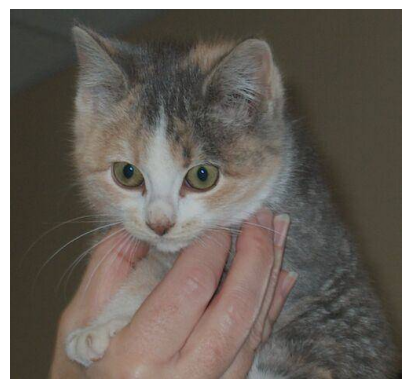

In [5]:
img = mpimg.imread(test_cat_image_path)

# 使用matplotlib.pyplot显示图片
plt.imshow(img)
plt.axis('off')  # 可选：关闭坐标轴显示
plt.show()

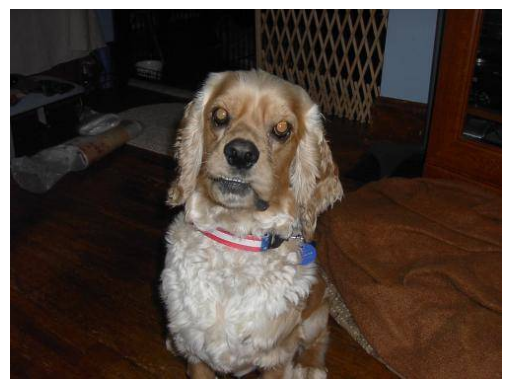

In [25]:
img = mpimg.imread(test_dog_image_path)

# 使用matplotlib.pyplot显示图片
plt.imshow(img)
plt.axis('off')  # 可选：关闭坐标轴显示
plt.show()

In [26]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import torchvision.models as models

# 定义图像预处理的转换函数
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 加载预训练的 ResNet 模型
model = None
model = models.resnet18()

fc_input_feature = model.fc.in_features
model.fc = torch.nn.Linear(fc_input_feature, 2)
model.load_state_dict(torch.load('/Users/luopeiyuan/Desktop/FYP/FYP_Codes/ImageClassifier/ResNet-1/MyModel/resnet18_Cat_Dog.pth'))
model.eval()

def test_resnet_classification_result(model, image_path):
    # 加载待分类的图像
    image = Image.open(image_path)

    # 图像预处理
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)

    # 使用加载的模型进行图像分类
    with torch.no_grad():
        output = model(input_batch)
        _, predicted_idx = torch.max(output, 1)
        predicted_class = predicted_idx.item()

    # 打印预测类别
    print("Predicted class:", predicted_class)

test_resnet_classification_result(model,test_cat_image_path)
test_resnet_classification_result(model,test_dog_image_path)

Predicted class: 0
Predicted class: 1


In [30]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import CNN.cnn

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小为模型所需的输入大小
    transforms.ToTensor(),  # 转换为张量
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 标准化图像
])

model1 = None
model1 = torch.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/ImageClassifier/CNN/MyModel/cnn.pkl")
model1.eval()  # 设置为评估模式
def test_model_with_img(model1, image_path):
    image = Image.open(image_path)  # 使用PIL库加载图像

    input_tensor = test_transform(image)  # 应用预处理转换函数
    input_batch = input_tensor.unsqueeze(0)  # 添加批次维度

    with torch.no_grad():
        output = model1(input_batch)  # 前向传播获取输出
        _, predicted_idx = torch.max(output, 1)  # 获取预测结果的索引
        predicted_class = predicted_idx.item()  # 获取预测结果的类别标签

    print("Predicted class:", predicted_class)
test_model_with_img(model1, test_cat_image_path)
test_model_with_img(model1, test_dog_image_path)

NotImplementedError: Module [cnn] is missing the required "forward" function